### Assignment 7 - Machine Learning, NEURAL NETWORK
### By: Sourita Nag and Sarah Ruckman

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.linalg import eig
import statistics as st
from scipy import linalg, io
import scipy

import torch
import torchvision
import imageio
import torch.optim as optim
import torch.nn as nn
import imageio as imageio
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
torch.set_printoptions(threshold=10_000)
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToPILImage

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


torch.Size([97, 128])
torch.Size([97, 128])
97 128


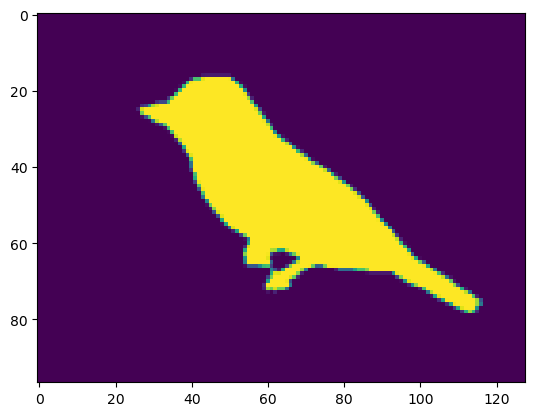

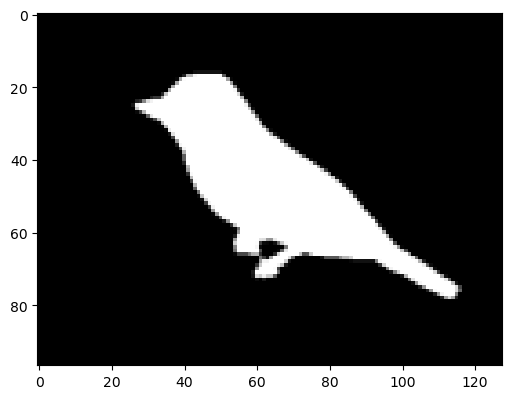

In [2]:
#importing the image and converting it to a tensor
img = imageio.v2.imread('bird038.png')
plt.imshow(img)
im=torch.from_numpy(img).float()
plt.figure(figsize=[6, 10])
print(im.shape)
#Checking for non zero values
torch.sum(im).item()
im = (im - torch.mean(im))/torch.std(im)
print(im.shape)

m,n = im.shape
print(m,n)
d = m*n
d  
input_size = 2

plt.imshow(im.detach().numpy(), cmap='gray')

In [3]:
#Input are the cordinates
#X
coordinates = torch.stack(torch.meshgrid(torch.arange(1,m+1,1), torch.arange(1,n+1,1))).permute(1, 2, 0).reshape(-1, 2)
coordinates.shape
X = coordinates.clone().float()
X = (X - torch.mean(X,dim = 0))/torch.std(X,dim = 0)

#Y 
Y  = torch.flatten(im).float().unsqueeze(1)
#Y = Y - torch.mean(Y,dim = 0)
X.shape,Y.shape

C:\Users\Sourita Nag\anaconda3\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(torch.Size([12416, 2]), torch.Size([12416, 1]))

### Part a

In [4]:
#Defining the Neural Network
class SimpleNet(nn.Module):
    def __init__(self,input_size):
        
        super(SimpleNet,self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128,1) #For regression output
        
    def forward(self,x1):
        x1 = F.relu(self.fc1(x1))
        x1 = self.fc2(x1)
        return x1
        

Text(0.5, 1.0, 'Plot of the Losses vs the epochs')

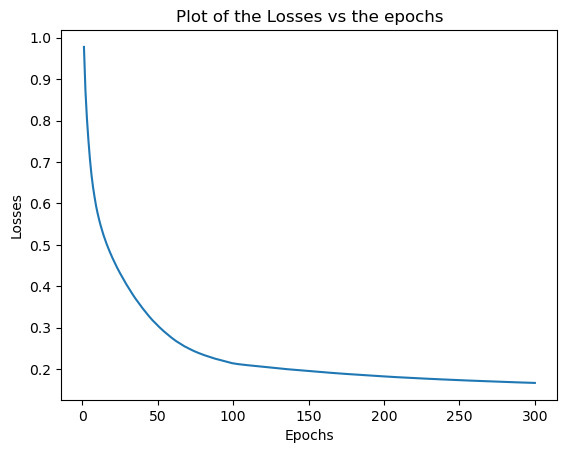

In [5]:
dataset=torch.utils.data.TensorDataset(X,Y) # dataset made of tensor data
loader=torch.utils.data.DataLoader(dataset,batch_size=64,shuffle=True)

net = SimpleNet(input_size)
#optimizer = optim.Adam(net.parameters(), lr=.01) 

Niter = 300
losses = []
l = 0.0001
for ep in range(1,Niter+1):
    sumloss = 0
    cnt = 0
    optimizer = optim.Adam(net.parameters(), lr=l) 
    for data in loader:
        xi,yi = data
        #optimizer = optim.Adam(net.parameters(), lr=l) 
        optimizer.zero_grad()
        yhat = net(xi)
        loss = torch.mean((yhat.view(-1,1) - yi.view(-1,1))**2)
        loss.backward()
        optimizer.step()
        sumloss+=loss.item()#*xi.shape[0]
        cnt = cnt+1
      
    losses.append(sumloss/cnt)
    if (ep%100 == 0):
        l = 0.0001/2
    #print(f'Losses {sumloss/cnt}for {ep}')
    
plt.plot(np.arange(1,Niter+1,1),losses)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Plot of the Losses vs the epochs')

In [6]:
# model_state_dict = net.state_dict()
# fc1_weights = model_state_dict['fc1.weight']
# fc1_biases = model_state_dict['fc1.bias']
# fc1_weights

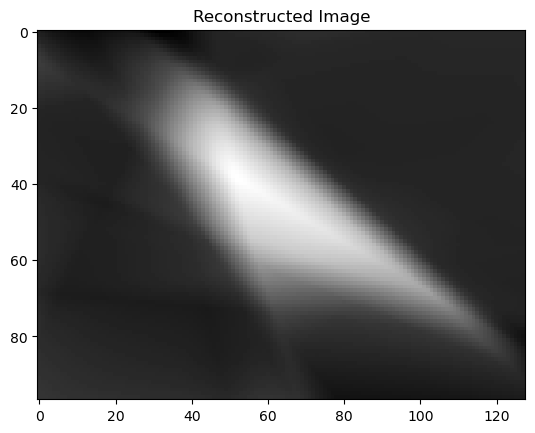

In [7]:
#Getting the reconstructed image
#net = SimpleNet(2)
#net.eval()
y_preds = net(X)


with torch.no_grad():
    y_preds = net(X)
y_preds = y_preds.view(m,n).numpy()

# Display the reconstructed image
plt.imshow(y_preds, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

### Part b

In [8]:
#Defining the Neural Network
output_size = m*n

class SimpleNet(nn.Module):
    def __init__(self,input_size):
        #self.flatten = nn.Flatten()
        
        super(SimpleNet,self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32,128)
        self.fc3 = nn.Linear(128,1) #For regression output
        
    def forward(self,x1):
        x1 = F.relu(self.fc1(x1))
        x1 = F.relu(self.fc2(x1))
        x1 = self.fc3(x1)
        return x1
        

Text(0.5, 1.0, 'Plot of the Losses vs the epochs')

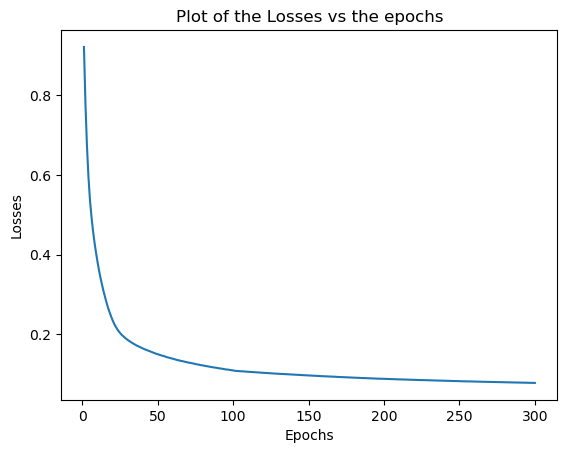

In [9]:
dataset=torch.utils.data.TensorDataset(X,Y) # dataset made of tensor data
loader=torch.utils.data.DataLoader(dataset,batch_size=64,shuffle=True)

net = SimpleNet(input_size)

Niter = 300
losses = []
l = 0.0001
for ep in range(1,Niter+1):
    sumloss = 0
    cnt = 0
    optimizer = optim.Adam(net.parameters(), lr=l) 
    for data in loader:
        xi,yi = data
        #optimizer = optim.Adam(net.parameters(), lr=l) 
        optimizer.zero_grad()
        yhat = net(xi)
        loss = torch.mean((yhat.view(-1,1) - yi.view(-1,1))**2)
        loss.backward()
        optimizer.step()
        sumloss+=loss.item()#*xi.shape[0]
        cnt = cnt+1
      
    losses.append(sumloss/cnt)
    if (ep%100 == 0):
        l = 0.0001/2
    #print(f'Losses {sumloss/cnt}for {ep}')
    
plt.plot(np.arange(1,Niter+1,1),losses)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Plot of the Losses vs the epochs')

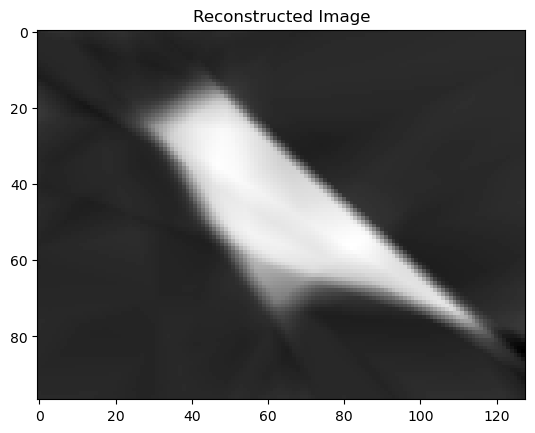

In [10]:
#Getting the reconstructed image
#net = SimpleNet(2)
#net.eval()
y_preds = net(X)


with torch.no_grad():
    y_preds = net(X)
y_preds = y_preds.view(m,n).numpy()

# Display the reconstructed image
plt.imshow(y_preds, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

### Part c

In [11]:
#Defining the Neural Network

class SimpleNet(nn.Module):
    def __init__(self,d):
        #self.flatten = nn.Flatten()
        
        super(SimpleNet,self).__init__()
        self.fc1 = nn.Linear(d, 32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64,128)
        self.fc4 = nn.Linear(128,1) #For regression output
        
    def forward(self,x1):
        x1 = F.relu(self.fc1(x1))
        x1 = F.relu(self.fc2(x1))
        x1 = F.relu(self.fc3(x1))
        x1 = self.fc4(x1)
        return x1
        

Text(0.5, 1.0, 'Plot of the Losses vs the epochs')

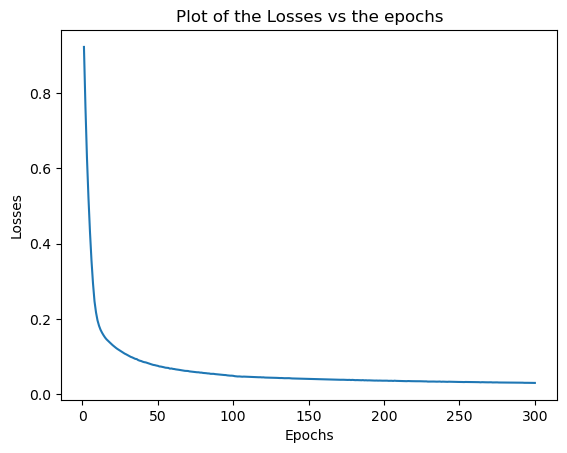

In [12]:
dataset=torch.utils.data.TensorDataset(X,Y) # dataset made of tensor data
loader=torch.utils.data.DataLoader(dataset,batch_size=64,shuffle=True)

net = SimpleNet(input_size)

Niter = 300
losses = []
l = 0.0001
for ep in range(1,Niter+1):
    sumloss = 0
    optimizer = optim.Adam(net.parameters(), lr=l) 
    cnt = 0
    for data in loader:
        xi,yi = data
        #optimizer = optim.Adam(net.parameters(), lr=l) 
        optimizer.zero_grad()
        yhat = net(xi)
        loss = torch.mean((yhat.view(-1,1) - yi.view(-1,1))**2)
        loss.backward()
        optimizer.step()
        sumloss+=loss.item()#*xi.shape[0]
        cnt = cnt+1
      
    losses.append(sumloss/cnt)
    if (ep%100 == 0):
        l = 0.0001/2
    #print(f'Losses {sumloss/cnt}for {ep}')
    
plt.plot(np.arange(1,Niter+1,1),losses)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Plot of the Losses vs the epochs')

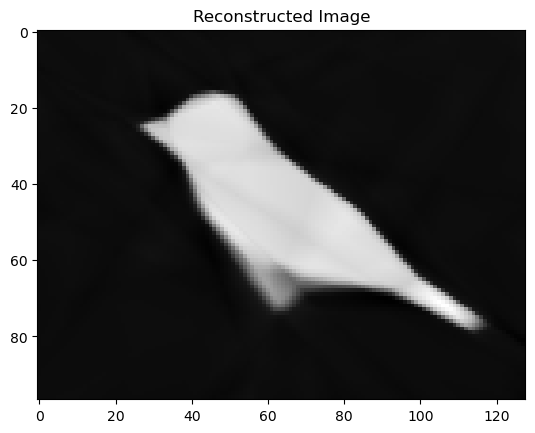

In [13]:
#Getting the reconstructed image
#net = SimpleNet(2)
y_preds = net(X)


with torch.no_grad():
    y_preds = net(X)
y_preds = y_preds.view(m,n).numpy()

# Display the reconstructed image
plt.imshow(y_preds, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

### Part d

In [14]:
#Defining the Neural Network

class SimpleNet(nn.Module):
    def __init__(self,d):
        
        
        super(SimpleNet,self).__init__()
        self.fc1 = nn.Linear(d, 32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64,128)
        self.fc4 = nn.Linear(128,128)
        self.fc5 = nn.Linear(128,1) #For regression output
        
    def forward(self,x1):
        x1 = F.relu(self.fc1(x1))
        x1 = F.relu(self.fc2(x1))
        x1 = F.relu(self.fc3(x1))
        x1 = F.relu(self.fc4(x1))
        x1 = self.fc5(x1)
        return x1
        

Text(0.5, 1.0, 'Plot of the Losses vs the epochs')

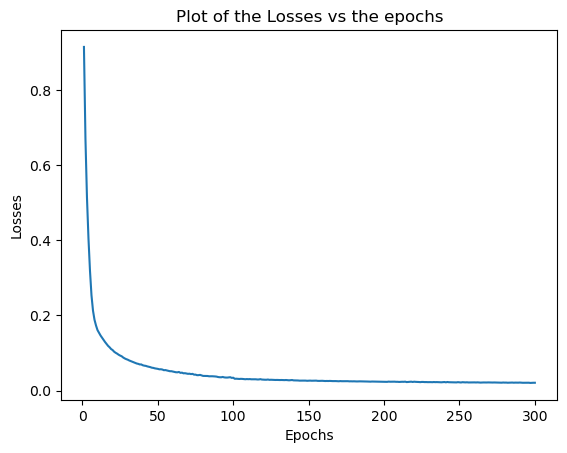

In [15]:
dataset=torch.utils.data.TensorDataset(X,Y) # dataset made of tensor data
loader=torch.utils.data.DataLoader(dataset,batch_size=64,shuffle=True)

net = SimpleNet(input_size)

Niter = 300
losses = []
l = 0.0001
for ep in range(1,Niter+1):
    sumloss = 0
    optimizer = optim.Adam(net.parameters(), lr=l) 
    cnt = 0
    for data in loader:
        xi,yi = data
        #optimizer = optim.Adam(net.parameters(), lr=l) 
        optimizer.zero_grad()
        yhat = net(xi)
        loss = torch.mean((yhat.view(-1,1) - yi.view(-1,1))**2)
        loss.backward()
        optimizer.step()
        sumloss+=loss.item()#*xi.shape[0]
        cnt = cnt+1
      
    losses.append(sumloss/cnt)
    if (ep%100 == 0):
        l = 0.0001/2
    #print(f'Losses {sumloss/cnt}for {ep}')
    
plt.plot(np.arange(1,Niter+1,1),losses)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Plot of the Losses vs the epochs')

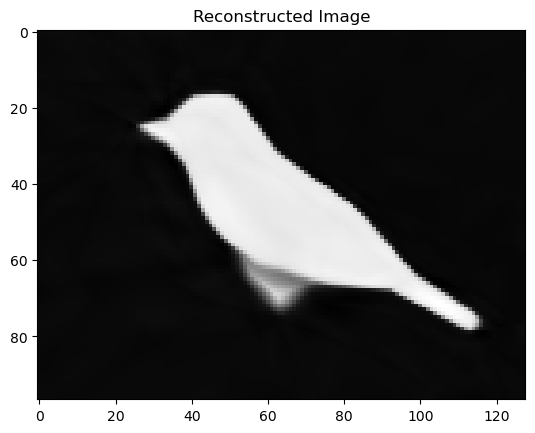

In [16]:
#Getting the reconstructed image
#net = SimpleNet(2)
y_preds = net(X)


with torch.no_grad():
    y_preds = net(X)
y_preds = y_preds.view(m,n).numpy()

# Display the reconstructed image
plt.imshow(y_preds, cmap='gray')
plt.title('Reconstructed Image')
plt.show()